<a href="https://colab.research.google.com/github/NiteeshSingh/SOC-Season-Of-Codes/blob/main/Practice/LinearRegression/Regression_Model_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/1.01. Simple linear regression.csv')
df.head()

,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


In [3]:
X = np.array(df.X.values.reshape(-1, 1))
Y = np.array(df.Y.values.reshape(-1, 1))
type(X), X.shape

(numpy.ndarray, (45, 1))

In [4]:
X = (X-X.mean())/X.std()
Y = (Y-Y.mean())/Y.std()
type(X), X.shape

(numpy.ndarray, (45, 1))

In [5]:
x_train, x_test = X[:40, :], X[40:, :]
y_train, y_test = Y[:40, :], Y[40:, :] 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 1), (5, 1), (40, 1), (5, 1))

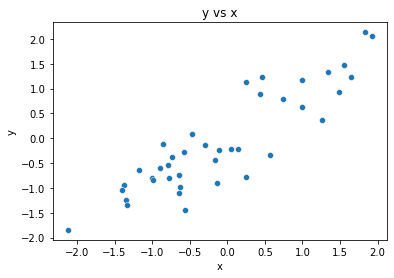

In [6]:
sns.scatterplot(x=x_train[:, 0], y=y_train[:, 0])
plt.title("y vs x")
plt.xlabel("x")
plt.ylabel("y");

### Linear regression model building

In [7]:
def mse_loss(y_pred, y):
  '''Takes in true and predicted value and returns mean squared error loss'''
  return ((np.array(y_pred)-np.array(y))**2).mean()/2

In [8]:
def get_gradient(X, y, Theta, bias):
  '''Takes in -
  X - numpy 2-d array of shape  #examples x #features conatining dataset
  y - numpy array of shape #example x 1 containing true values for prediction
  Theta - numpy array of shape 1 x #features contining weights of our model at current state
  bias - bias of our model scaler number

  Returns- a tuple of
  gradient w.r.t each weights a numpy array of shape as of Theta array
  gradient w.r.t bias a scalar
  '''
  n = len(y) #number of examples and m = #features
  e = np.dot(X, Theta).reshape(-1, 1) + bias - y
  grad_theta = (X.T @ e) / n #shape m x 1    
  grad_bias = sum(e) / n
  
  return (grad_theta.T, grad_bias)

In [9]:
def initialise(dim):
  '''Takes in dimension of Theta vector

  Returns a tuple of
  randomly initialise array of shape 1 x dim
  random bias scaler
  '''

  return (np.random.rand(1, dim), np.random.rand(1,1))

In [10]:
def grdient_descent(X, y, lr=0.01, iterations=100, loss_iter = 1):
  '''Takes in -
  X - np array of shape #example x features
  y - np array of shape #example x 1
  lr - Learning Rate
  iterations - Number of Iteration to perform
  loss_iter - after this much iteration loss will be calculated for e.g.- 
    0-loss will not be calculated
    1-loss calculated every iteration
    2-loss calculated every secon iteration i.e 0, 2, ...
    and so on

  returns - tuple of
  Optimum Theta
  Optimum bias
  dictionary of key=iteration number and val=loss at that iteration
  '''
  Theta, bias = initialise(X.shape[1])
  loss = {}

  for iter in range(iterations):
    if loss_iter!=0 and iter%loss_iter==0:
      h = np.dot(X, Theta).reshape(-1, 1) + bias
      loss[iter] = mse_loss(h, y)

    grad_theta, grad_bias = get_gradient(X, y, Theta, bias)
    Theta = Theta - lr*grad_theta
    bias = bias - lr*grad_bias
  
  return (Theta, bias, loss)

In [11]:
def predict(X, Theta, bias):
  '''Takes in 
  X - np array of shape #example x #features  (n x m)
  Theta - np array of shape 1 x #features (1 x m) continig optimal theta values
  bias - scaler bias term of model

  returns 
  predicted value of model an array of shape n x 1
  '''
  return np.dot(X, Theta).reshape(-1, 1) + bias

### traning and result of model

In [12]:
w, b , loss= grdient_descent(x_train, y_train, lr=0.01, iterations=500)
print("training done")
print(f"trained weights {w}")
print(f"trained biase {b}")

training done
trained weights [[0.86741735]]
trained biase [[-0.014196]]


Text(0, 0.5, 'Loss value')

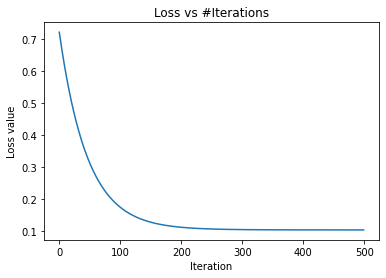

In [13]:
sns.lineplot(x=loss.keys(), y=loss.values());
plt.title("Loss vs #Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss value")

In [14]:
y_pred = predict(x_train, w, b)
y_pred[:5, :]

array([[-0.75667963],
       [-0.56727054],
       [-0.65250463],
       [-1.18285008],
       [-0.41574327]])

Text(0, 0.5, 'y')

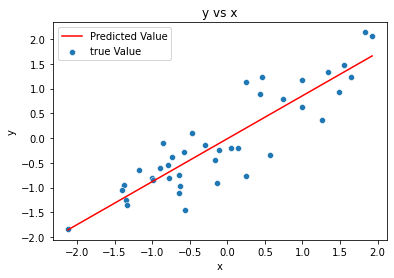

In [17]:
sns.scatterplot(x=x_train[:, 0], y=y_train[:, 0], label="true Value")
sns.lineplot(x=x_train[:, 0], y=y_pred[:, 0], label="Predicted Value", color='red')
plt.title("y vs x")
plt.xlabel("x")
plt.ylabel("y")